In [3]:
import os
import csv
import seaborn as sns
import copy as cp
import numpy as np
from sklearn import metrics
from matplotlib import pyplot as plt
import pandas as pd

activity = 'running'
dir_path = os.getcwd()

act_filename = activity + '.txt'
actfile_dir = os.path.join(dir_path, 'activity_files')
actfile_path = os.path.join(dir_path, act_filename)

cnt = 1
for file in os.listdir(actfile_dir):
    print(file)


jumping_23-02-2020_111922.txt
jumping_25-02-2020_094215.txt
lying_on_side_24-02-2020_134922.txt
running_24-02-2020_151633.txt
sitting_24-02-2020_081708.txt
standing_29-12-2019_062041.txt
standing_29-12-2019_063829.txt
supine_24-02-2020_125443.txt
walking_23-02-2020_165231.txt


In [20]:

with open(actfile_path, mode='w', newline='') as fw:
    csv_wrt = csv.writer(fw, delimiter=' ')
    for file in os.listdir(actfile_dir):
        if file.startswith(activity):
            print('[LOG]: Extract samples from file: ' + file)
            filepath = os.path.join(actfile_dir, file)
            with open(filepath, mode='r') as fr:
                csv_rd = csv.reader(fr, delimiter=',')
                for line in csv_rd:
                    if len(line) == 13:
                        rd = [float(line[i].replace(' ','')) for i in range(0,len(line))]
                        rd = list(map(int, rd))
                        rd = rd[1:]
                        csv_wrt.writerow(rd)
            fr.close()
fw.close()

[LOG]: Extract samples from file: running_24-02-2020_151633.txt


[LOG]: Extract samples from session file: C:\Users\grgcz\Desktop\dev_space_win\AOS_Project\AOS_MovementRecognition\neural_net-py\datasets\activity_files\running_24-02-2020_151633.txt


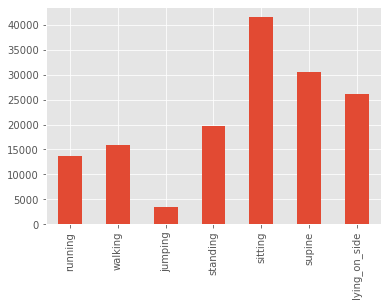

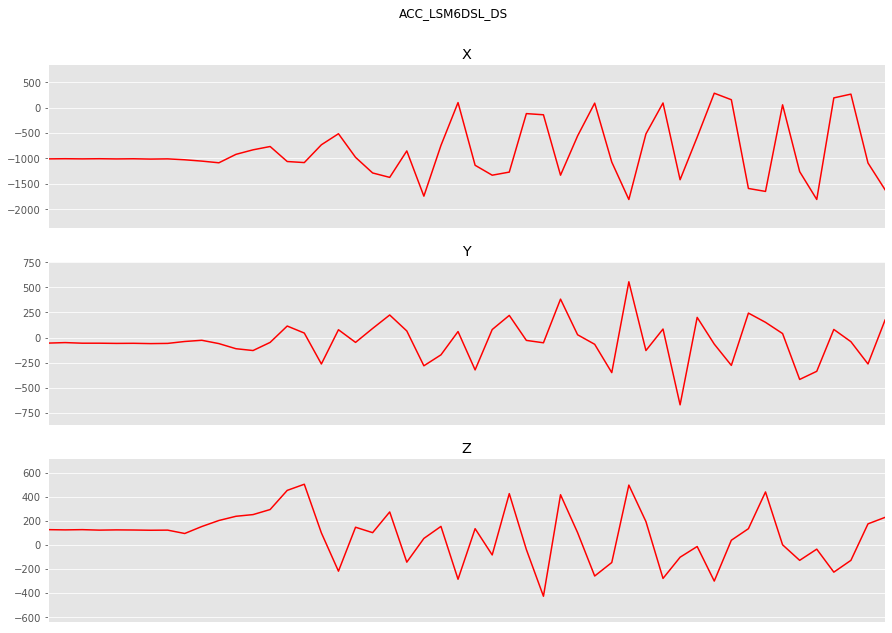

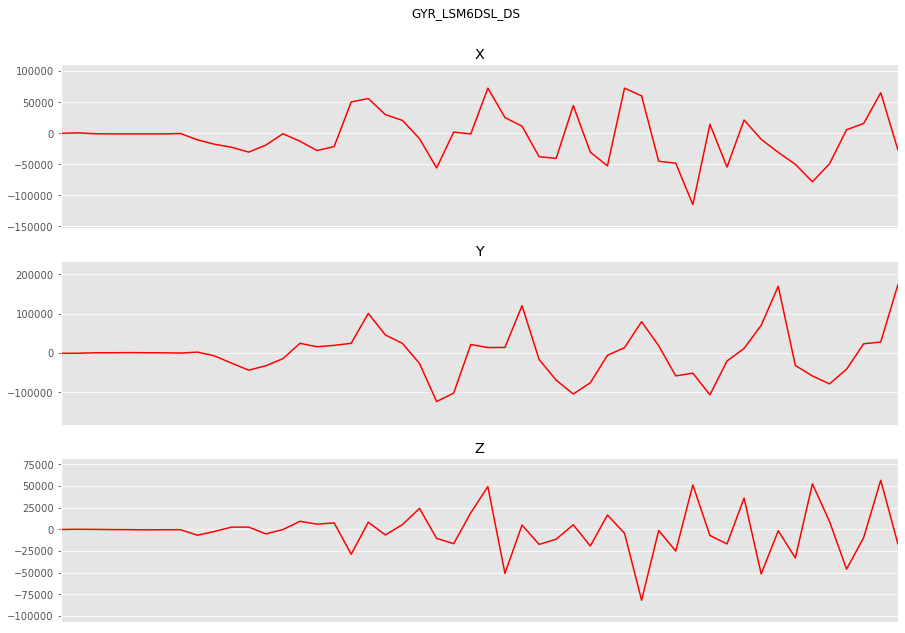

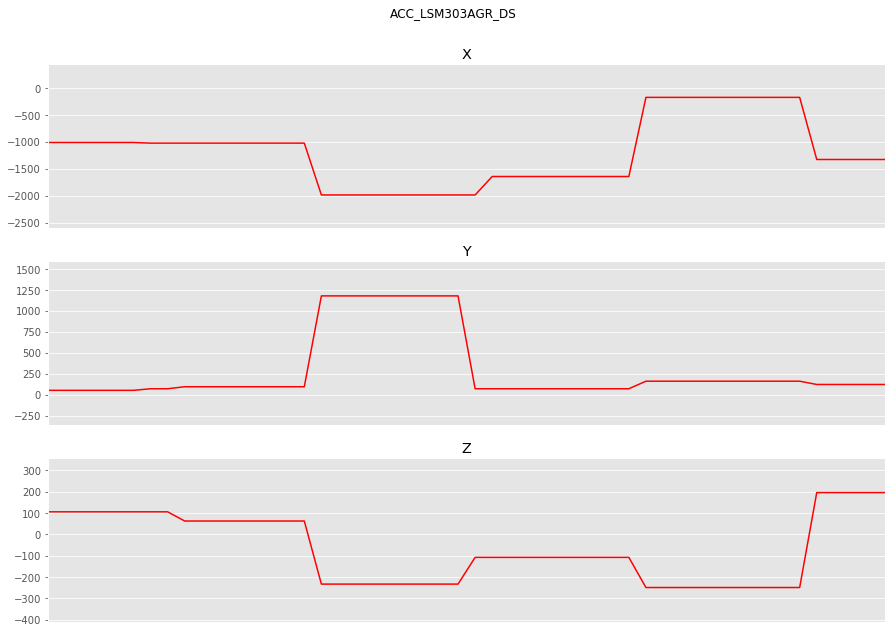

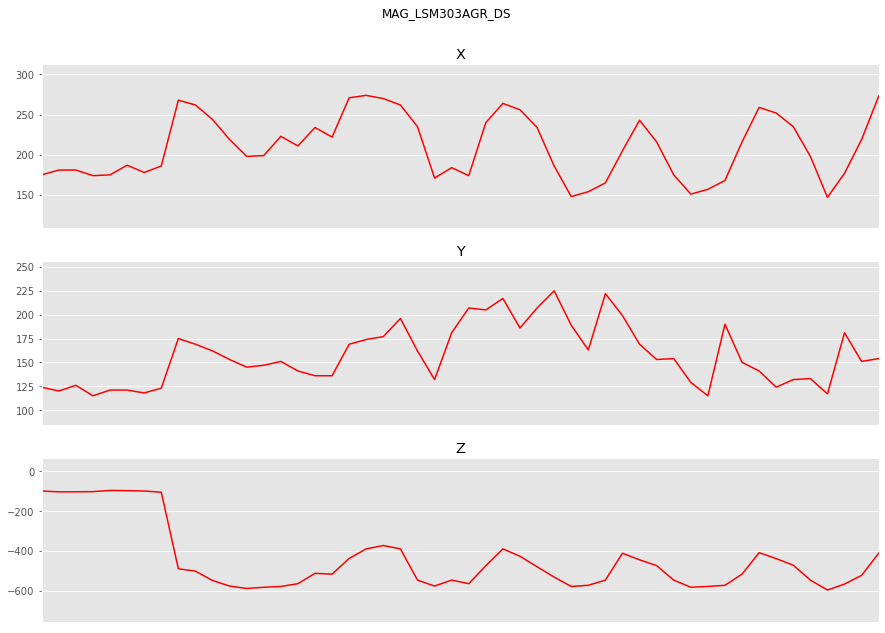

In [21]:
ds_model = {"ACC_LSM6DSL_DS": {"x": [], "y": [], "z": []}, "GYR_LSM6DSL_DS": {"x": [], "y": [], "z": []},
                   "ACC_LSM303AGR_DS": {"x": [], "y": [], "z": []}, "MAG_LSM303AGR_DS": {"x": [], "y": [], "z": []}}
SENSORS = ["ACC_LSM6DSL_DS", "GYR_LSM6DSL_DS", "ACC_LSM303AGR_DS", "MAG_LSM303AGR_DS"]
AXIS = ["x", "y", "z"]
session_dir = "activity_files"
LABELS = ["running",
          "walking",
          "jumping",
          "standing",
          "sitting",
          "sit_ups",
          "supine",
          "lying_on_side"]

def get_activity_session(filename):

    res = cp.deepcopy(ds_model)

    print('[LOG]: Extract samples from session file: ' + filename)
    filepath = os.path.join(session_dir, filename)
    with open(filepath, mode='r') as fr:
        csv_rd = csv.reader(fr, delimiter=',')
        r_count = 1
        for line in csv_rd:
            if len(line) == 13:
                rd = [float(line[i].replace(' ', '')) for i in range(0, len(line))]
                rd = list(map(int, rd))
                rd = rd[1:]

                v_count = 0
                for s in SENSORS:
                    for a in AXIS:
                        if v_count == 12:
                            v_count = 0
                            r_count += 1
                        res[s][a].append(rd[v_count])
                        v_count += 1
    res['ts'] = [i for i in range(1,r_count+1)]
    fr.close()

    return res


def plot_temporal_activity(filepath, limit=0):

    ds_view = get_activity_session(filepath)
    ds_view['ts'] = [i for i in range(1,len(ds_view[SENSORS[0]]['x'])+1)]
    session = filepath.split('/')[-1]

    for sens in SENSORS:

        fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15,10), sharex=True)
        
        if limit > 0:
            plot_axis(ax0, ds_view['ts'][:limit], ds_view[sens]['x'][:limit], 'X')
            plot_axis(ax1, ds_view['ts'][:limit], ds_view[sens]['y'][:limit], 'Y')
            plot_axis(ax2, ds_view['ts'][:limit], ds_view[sens]['z'][:limit], 'Z')
        else:
            plot_axis(ax0, ds_view['ts'], ds_view[sens]['x'], 'X')
            plot_axis(ax1, ds_view['ts'], ds_view[sens]['y'], 'Y')
            plot_axis(ax2, ds_view['ts'], ds_view[sens]['z'], 'Z')
            
        plt.subplots_adjust(hspace=0.2)
        fig.suptitle(sens)
        plt.subplots_adjust(top=0.90)
        plt.show()


def plot_axis(ax, x, y, title):

    ax.plot(x, y, 'r')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

    

def show_activities_histogram():
    plt.style.use('ggplot')
    smp_cnt = []
    activities = []
    for act in LABELS:
        file_path = act+'.txt'
        if os.path.exists(file_path):
            smp_cnt.append(len(open(file_path, mode='r').readlines()))
            activities.append(act)

    x= pd.Series(smp_cnt, index=activities)
    x.plot(kind='bar', grid=True)   
    
    

act_filename = 'running_24-02-2020_151633.txt'
actfile_dir = os.path.join(dir_path, 'activity_files')
actfile_path = os.path.join(actfile_dir, act_filename)

show_activities_histogram()
plot_temporal_activity(actfile_path, limit=50)